In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\gyanp\Energy_optimizer\Prototype_energy_opt_dataset.csv")

# Display the first few rows of the dataset
df.head()

,Business_ID,Business_Name,Location,Energy_Usage_kWh,HVAC_Usage_kWh,Lighting_Usage_kWh,Equipment_Usage_kWh,Occupancy,Weather_Condition,Cost_per_kWh,Total_Cost
0,1,Business_1,Location_1,453,108,99,111,26,Sunny,0.211116,95.64
1,2,Business_2,Location_2,432,83,78,59,91,Cloudy,0.170089,73.48
2,3,Business_3,Location_3,224,104,85,123,85,Sunny,0.186358,41.74
3,4,Business_4,Location_4,218,141,37,147,12,Cloudy,0.152062,33.15
4,5,Business_5,Location_5,443,198,46,76,30,Cloudy,0.255211,113.06


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Get basic information about the dataset
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Business_ID          50 non-null     int64  
 1   Business_Name        50 non-null     object 
 2   Location             50 non-null     object 
 3   Energy_Usage_kWh     50 non-null     int64  
 4   HVAC_Usage_kWh       50 non-null     int64  
 5   Lighting_Usage_kWh   50 non-null     int64  
 6   Equipment_Usage_kWh  50 non-null     int64  
 7   Occupancy            50 non-null     int64  
 8   Weather_Condition    50 non-null     object 
 9   Cost_per_kWh         50 non-null     float64
 10  Total_Cost           50 non-null     float64
dtypes: float64(2), int64(6), object(3)
memory usage: 4.4+ KB
None


In [4]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())




Summary Statistics:
       Business_ID  Energy_Usage_kWh  HVAC_Usage_kWh  Lighting_Usage_kWh  \
count     50.00000         50.000000       50.000000           50.000000   
mean      25.50000        367.480000      127.200000           66.740000   
std       14.57738         90.087087       33.651273           20.322713   
min        1.00000        122.000000       40.000000           25.000000   
25%       13.25000        310.000000      104.250000           50.250000   
50%       25.50000        375.000000      127.500000           70.000000   
75%       37.75000        446.750000      150.000000           80.000000   
max       50.00000        500.000000      200.000000          100.000000   

       Equipment_Usage_kWh  Occupancy  Cost_per_kWh  Total_Cost  
count            50.000000  50.000000     50.000000   50.000000  
mean             90.940000  42.580000      0.184728   66.670400  
std              34.734215  24.463292      0.028048   18.273733  
min              30.000000  10

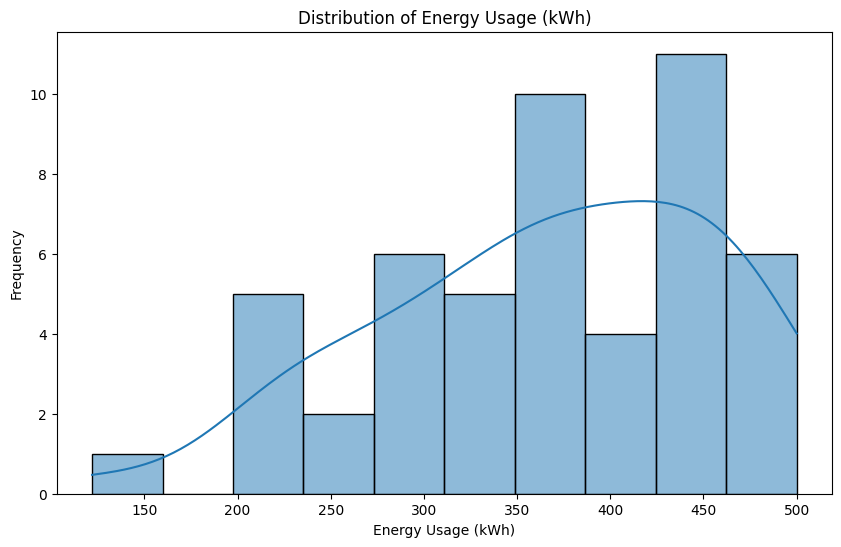

In [5]:
# Visualize the distribution of monthly energy usage
plt.figure(figsize=(10, 6))
sns.histplot(df['Energy_Usage_kWh'], bins=10, kde=True)
plt.title('Distribution of Energy Usage (kWh)')
plt.xlabel('Energy Usage (kWh)')
plt.ylabel('Frequency')
plt.show()

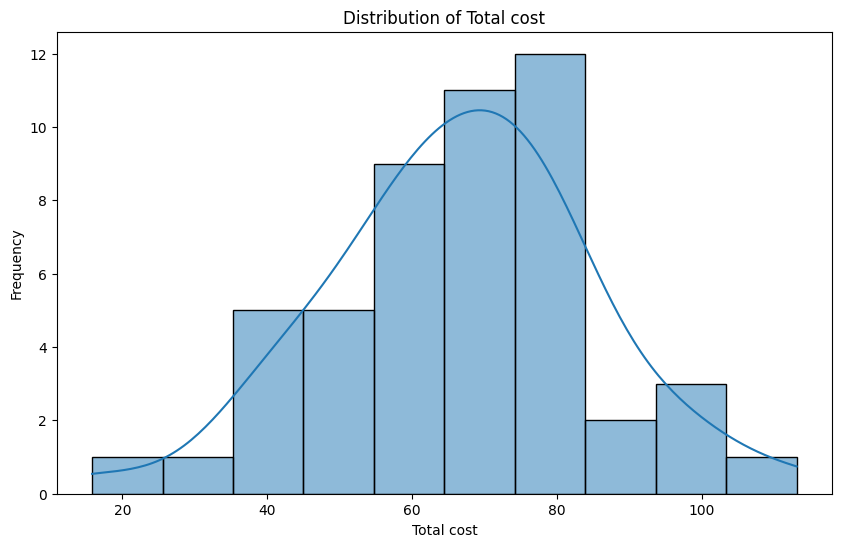

In [6]:
# Visualize the distribution of monthly energy usage
plt.figure(figsize=(10, 6))
sns.histplot(df['Total_Cost'], bins=10, kde=True)
plt.title('Distribution of Total cost')
plt.xlabel('Total cost')
plt.ylabel('Frequency')
plt.show()

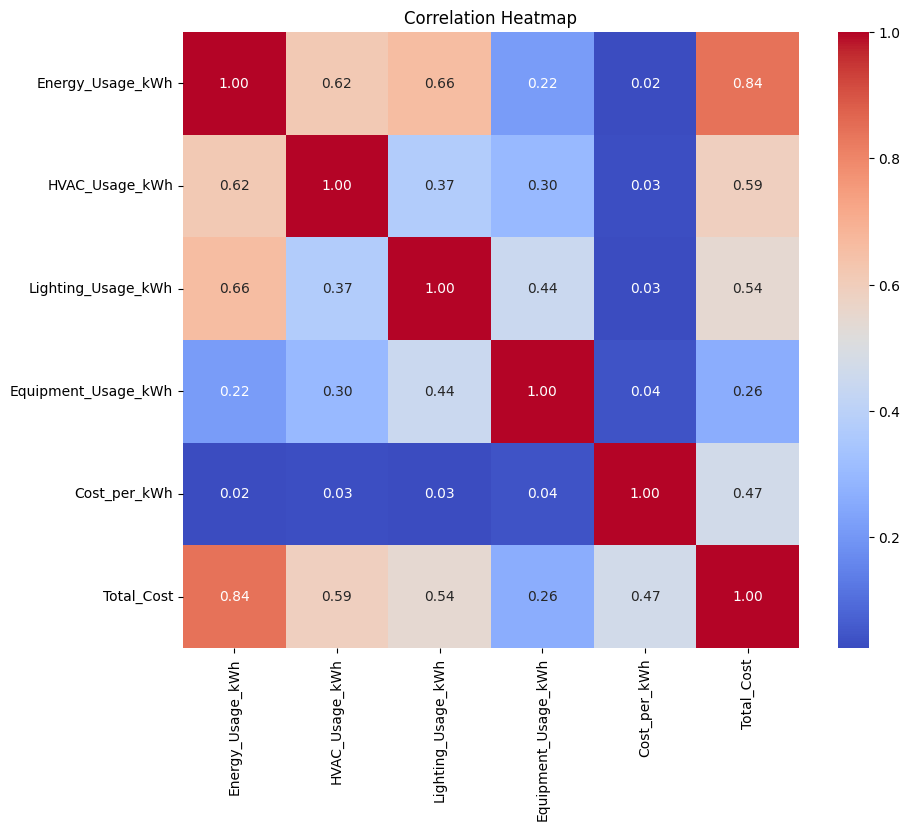

In [7]:
# Correlation heatmap

df_num = df[["Energy_Usage_kWh", "HVAC_Usage_kWh", "Lighting_Usage_kWh", "Equipment_Usage_kWh", "Cost_per_kWh", "Total_Cost"]]

# Create a correlation heatmap
plt.figure(figsize=(10, 8))  # Adjusting the figure size for better readability
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)

plt.title('Correlation Heatmap')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = df[['Energy_Usage_kWh']]
y = df['Total_Cost']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "None of [Index(['Energy_Usage_kwh'], dtype='object')] are in the [columns]"

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.plot(X_test, y_pred, color='green', linewidth=2)
plt.title('Actual vs Predicted Annual Cost')
plt.xlabel('Monthly Energy Usage (kWh)')
plt.ylabel('Annual Cost ($)')
plt.legend()
plt.show()

In [ ]:
import pickle

# Save the model to a pickle file
with open('energy_cost_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as 'energy_cost_model.pkl'")
